In [1]:
import os
import glob
import pyart
import pyscancf as pcf


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119


## Cite PyScanCf:

## Syed, H. A.,Sayyed, I., Kalapureddy, M. C. R., & Grandhi, K. K.(2021). 
## PyScanCf – The library for individual sweep datasets of IMD weather radars. 
## Zenodo. doi:10.5281/zenodo.5574160.



In [2]:
input_dir = "/Users/syed44/Downloads/Jaipur_Radar/sweeps/"
out_dir = "/Users/syed44/Downloads/Jaipur_Radar/cfrad/"

In [3]:
pcf.cfrad(input_dir=input_dir, output_dir=out_dir, scan_type='B', dualpol=True, gridder=False)

Number of files:  10
Total no. of output files: 1.
Merging all scans into one Volume
Data merging done 
Total Time Elapsed:  0:00:00.887120


In [4]:
ls $out_dir

GRIDS/                          cfrad_JPR220701000253-IMD-B.nc


In [5]:
radar = pyart.io.read("/Users/syed44/Downloads/Jaipur_Radar/cfrad/cfrad_JPR220701000253-IMD-B.nc")

In [6]:
display = pyart.graph.RadarDisplay(radar)

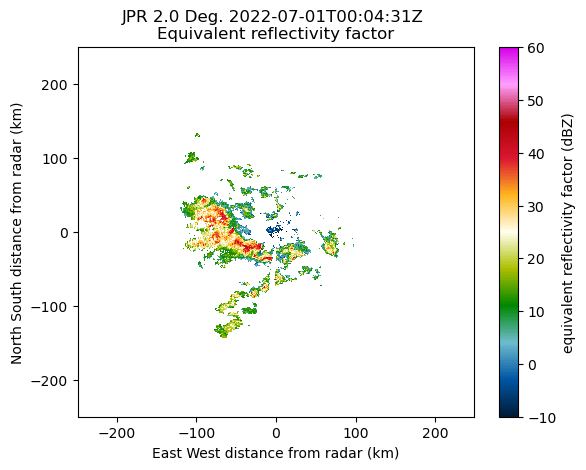

In [7]:
display.plot("REF", sweep=2, vmin=-10, vmax=60, cmap='SyedSpectral')

In [8]:
radar.fields.keys()

dict_keys(['REF', 'VEL', 'WIDTH', 'ZDR', 'HCLASS'])

In [9]:
cf_files = glob.glob(os.path.join(out_dir, "*.nc"))
cf_files.sort()
print(len(cf_files))

1


In [10]:
radar.range['data'].max()/1e3

249.5

In [11]:
z_grid_limits = (0.,10_000.)
y_grid_limits = (-250_000.,250_000.)
x_grid_limits = (-250_000.,250_000.)

In [12]:
vert_grid_resolution = 500
hort_grid_resolution = 1000

In [13]:
def compute_number_of_points(extent, resolution):
    return int((extent[1] - extent[0])/resolution)

In [14]:
z_grid_points = compute_number_of_points(z_grid_limits, vert_grid_resolution)
z_grid_points

20

In [15]:
x_grid_points = compute_number_of_points(x_grid_limits, hort_grid_resolution)
x_grid_points

500

In [16]:
def _rename_file(file):
    return os.path.basename(file).replace("cfrad", 'GRID')

...............................
Plotting Max-REF 20220701000321
...............................

Figure(s) saved as /Users/syed44/Downloads/Jaipur_Radar/cfrad/GRIDS/Max-REF_JPR_20220701000321.png
Grid saved: GRID_JPR220701000253-IMD-B.nc


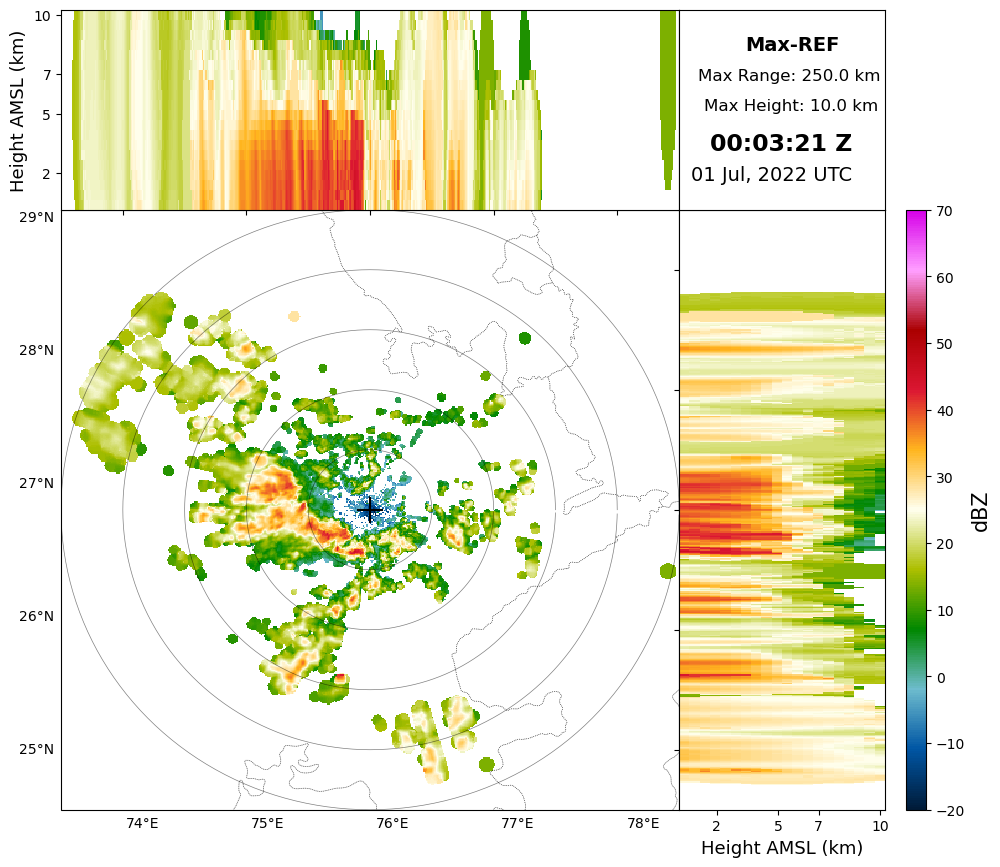

In [24]:
grid_dir = os.path.join(out_dir, 'GRIDS')
os.makedirs(grid_dir, exist_ok=True)
for file in cf_files:
    radar = pyart.io.read_cfradial(file)
    grid = pcf.get_grid(radar=radar, grid_shape=(20, 500, 500), height=10, length=250)
    newname = _rename_file(file)
    pyart.io.write_grid(filename=os.path.join(grid_dir, newname), grid=grid, write_point_lon_lat_alt=True)
    pcf.plot_cappi(grid, "REF", savedir=grid_dir)
    print(f"Grid saved: {newname}")